# Convolutional Neural Networks (CNNs)
## I) Introduction to Convolutional Neural Networks (CNNs)
Convolutional Neural Networks (CNNs) are a specialized type of neural network designed to process data with a grid-like structure, such as images. Unlike traditional Multilayer Perceptrons (MLPs), CNNs leverage spatial hierarchies in the data, making them highly effective for tasks like image classification, object detection, and segmentation.

CNNs are composed of several types of layers, including convolutional layers, pooling layers, and fully connected layers. The key innovation in CNNs is the use of convolutional operations, which allow the network to automatically and adaptively learn spatial hierarchies of features from the input data.

### A) Convolutional Layers
1. Convolution Operation
The core building block of a CNN is the convolutional layer. The convolution operation involves sliding a small matrix, called a kernel or filter, over the input data (e.g., an image) to produce a feature map. The kernel is typically much smaller than the input image, and it is applied to local regions of the input to extract features such as edges, textures, or patterns.

Mathematically, the convolution operation can be described as:

$$
Feature Map(i,j) = \sum_{m=0}^{k-1} \sum_{n=0}^{k-1} \text{Input}(i+m,j+n) \cdot \text{Kernel}(m,n)
$$

Where:

$\text{Input}(i, j)$ is the value of the input at position $(i, j)$.
$\text{Kernel}(m, n)$ is the value of the kernel at position $(m, n)$.
$k$ is the size of the kernel (e.g., 3x3 or 5x5).
The result of this operation is a feature map, which highlights the presence of specific features in the input data.

<img src ="static/convolution.png"/>

**Figure 1: Convolution operation applied to an image using a 3x3 kernel.**

Viewing a video can help understanding this concept better (https://www.youtube.com/watch?v=1GUgD2SBl9A).

2. Stride

The stride determines how many steps the kernel moves across the input data during the convolution operation. A stride of 1 means the kernel moves one pixel at a time, while a stride of 2 means it moves two pixels at a time. Increasing the stride reduces the spatial dimensions of the output feature map, which can help reduce computational complexity.

For example, if the input is a 5x5 image and the kernel is 3x3 with a stride of 1, the output feature map will be 3x3. If the stride is 2, the output feature map will be 2x2.

3. Padding

Padding is the process of adding extra pixels around the input data before applying the convolution operation. Padding is often used to control the spatial dimensions of the output feature map. Common padding strategies include:

Zero Padding: Adding zeros around the input data.

Valid Padding: No padding is applied, and the output feature map will be smaller than the input.

Same Padding: Padding is applied so that the output feature map has the same spatial dimensions as the input.

For example, if the input is a 5x5 image and the kernel is 3x3 with a stride of 1 and "same" padding, the output feature map will also be 5x5.

<img src="static/padding.png" height="50%" width="50%"/>

**Figure 2: Illustration of zero padding in a convolutional layer.**

### B) Pooling Layers
Pooling layers are used to reduce the spatial dimensions of the feature maps, which helps to reduce the computational complexity and control overfitting. The most common type of pooling is max pooling, where the maximum value within a local region of the feature map is selected.

1. Max Pooling

In max pooling, a window of size $k \times k$ is slid over the feature map with a specified stride, and the maximum value within each window is taken as the output. For example, if the input feature map is 4x4 and the pooling window is 2x2 with a stride of 2, the output will be a 2x2 feature map.

Mathematically, max pooling can be described as:


Pooled Output
$$
\text Pooled Output(i,j) = \max_{m=0}^{k-1} \max_{n=0}^{k-1} \text{Feature Map}(i \cdot s + m, j \cdot s + n)
$$
$$

$$

Where:

$s$ is the stride.
$k$ is the size of the pooling window.


2. Average Pooling
Another common pooling operation is average pooling, where the average value within a local region of the feature map is taken instead of the maximum value. Average pooling is less commonly used than max pooling but can be useful in certain scenarios.

<img src="static/pooling.png" height="50%" width="50%"/>

**Figure 3: Max pooling operation applied to a 4x4 feature map with a 2x2 window.**

### C) Fully Connected Layers
After several convolutional and pooling layers, the final layers of a CNN are typically fully connected layers, similar to those in an MLP. These layers take the high-level features extracted by the convolutional layers and use them to make predictions (e.g., classify an image into one of several categories).

### D) Key Takeaways
Convolutional Layers: CNNs use convolutional layers to extract spatial features from the input data. The convolution operation involves sliding a kernel over the input to produce a feature map.

Stride and Padding: Stride controls how the kernel moves across the input, while padding is used to control the spatial dimensions of the output feature map.

Pooling Layers: Pooling layers reduce the spatial dimensions of the feature maps, helping to reduce computational complexity and control overfitting.

Fully Connected Layers: The final layers of a CNN are typically fully connected layers that use the extracted features to make predictions.

CNNs are powerful tools for processing grid-like data, such as images, and have been instrumental in advancing the field of computer vision. By leveraging convolutional operations, CNNs can automatically learn hierarchical features, making them highly effective for a wide range of tasks.

<img src="static/ArchitectureCNN.png" height="50%" width="50%"/>

**Figure 4: Typical architecture of a Convolutional Neural Network (CNN).**

## II) Pytorch Implementation of CNNs

For the implementation, we will use a images from the ASL(American Sign Language) Alphabet. You can download it here : https://www.kaggle.com/datasets/grassknoted/asl-alphabet/data. The training data set contains 87,000 images which are 200x200 pixels. There are 29 classes, of which 26 are for the letters A-Z and 3 classes for SPACE, DELETE and NOTHING.
These 3 classes are very helpful in real-time applications, and classification. The test data set contains a mere 29 images, to encourage the use of real-world test images. Here we will use only the 87K images from the train set (divided into train, test & validation)

In [1]:
#Import data
import pandas as pd
import os

train_folder = 'C:/Users/Greg/Downloads/asl_alphabet_train' #Path where you downloaded the dataset
all_data = []
for folder in os.listdir(train_folder):
    
    label_folder = os.path.join(train_folder, folder)
    onlyfiles = [{'label':folder,'path':os.path.join(label_folder, f)} for f in os.listdir(label_folder) if os.path.isfile(os.path.join(label_folder, f))]
    #print(onlyfiles)
    all_data += onlyfiles
data_df = pd.DataFrame(all_data)
data_df.head()

,label,path
0,A,C:/Users/Greg/Downloads/asl_alphabet_train\A\A...
1,A,C:/Users/Greg/Downloads/asl_alphabet_train\A\A...
2,A,C:/Users/Greg/Downloads/asl_alphabet_train\A\A...
3,A,C:/Users/Greg/Downloads/asl_alphabet_train\A\A...
4,A,C:/Users/Greg/Downloads/asl_alphabet_train\A\A...


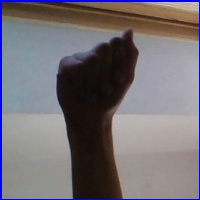

In [2]:
## Every path leads to a image
from IPython.display import Image, display

# Path to the image file
image_path = data_df["path"][0]

# Display the image
display(Image(filename=image_path))

In [3]:
## See classes distribution
data_df["label"].value_counts()

label
A          3000
B          3000
C          3000
D          3000
del        3000
E          3000
F          3000
G          3000
H          3000
I          3000
J          3000
K          3000
L          3000
M          3000
N          3000
nothing    3000
O          3000
P          3000
Q          3000
R          3000
S          3000
space      3000
T          3000
U          3000
V          3000
W          3000
X          3000
Y          3000
Z          3000
Name: count, dtype: int64

In [4]:
# Now let's split our data between a train, test, split set
from sklearn.model_selection import train_test_split

# Split into train and test sets
train_df, test_df = train_test_split(data_df, test_size=0.10, stratify=data_df['label'], random_state=42)

# Split the train set into train and validation sets
train_df, val_df = train_test_split(train_df, test_size=0.15, stratify=train_df['label'], random_state=42)

# print("Train set class distribution:")
# print(train_df['label'].value_counts(normalize=True))

# print("Validation set class distribution:")
# print(val_df['label'].value_counts(normalize=True))

# print("Test set class distribution:")
# print(test_df['label'].value_counts(normalize=True))

In [5]:
# Before building our CNN let's see some of the operations

import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision.transforms as transforms
from PIL import Image
import matplotlib.pyplot as plt

# Load the image
image_path = data_df["path"][0]  # Replace with your image path
image = Image.open(image_path).convert('L')  # Convert to grayscale

# Convert the image to a PyTorch tensor
transform = transforms.ToTensor()
image_tensor = transform(image).unsqueeze(0)  # Add batch dimension

print(f"Original Image Shape: {image_tensor.shape}")

Original Image Shape: torch.Size([1, 1, 200, 200])


Convolved Image Shape: torch.Size([1, 1, 200, 200])


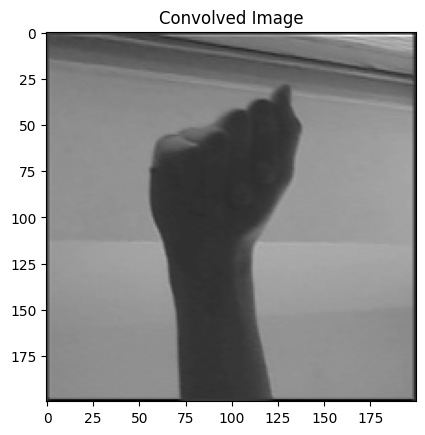

In [6]:
# Define a convolutional layer with a 3x3 kernel, stride of 1, and padding of 1
conv_layer = nn.Conv2d(in_channels=1, out_channels=1, kernel_size=3, stride=1, padding=1)

# Apply the convolution operation
output_conv = conv_layer(image_tensor)

print(f"Convolved Image Shape: {output_conv.shape}")

# Visualize the convolved image
plt.imshow(output_conv.squeeze().detach().numpy(), cmap='gray')
plt.title("Convolved Image")
plt.show()

Pooled Image Shape: torch.Size([1, 1, 100, 100])


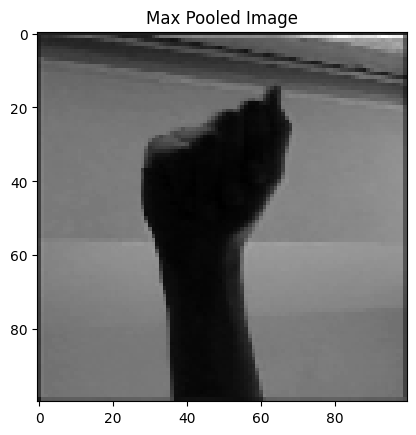

In [7]:
# Define a max pooling layer with a 2x2 window and stride of 2
max_pool_layer = nn.MaxPool2d(kernel_size=2, stride=2)

# Apply max pooling
output_pool = max_pool_layer(output_conv)

print(f"Pooled Image Shape: {output_pool.shape}")

# Visualize the pooled image
plt.imshow(output_pool.squeeze().detach().numpy(), cmap='gray')
plt.title("Max Pooled Image")
plt.show()

Average Pooled Image Shape: torch.Size([1, 1, 100, 100])


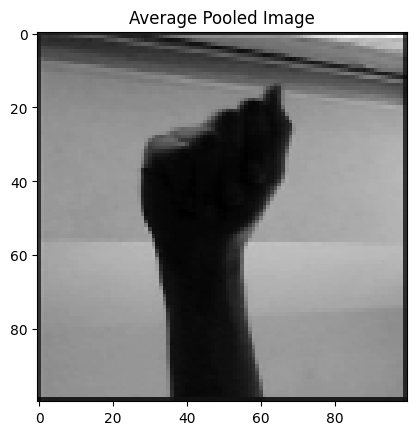

In [8]:
# Define an average pooling layer with a 2x2 window and stride of 2
avg_pool_layer = nn.AvgPool2d(kernel_size=2, stride=2)

# Apply average pooling
output_avg_pool = avg_pool_layer(output_conv)

print(f"Average Pooled Image Shape: {output_avg_pool.shape}")

# Visualize the average pooled image
plt.imshow(output_avg_pool.squeeze().detach().numpy(), cmap='gray')
plt.title("Average Pooled Image")
plt.show()

Convolved Image with Stride 2 Shape: torch.Size([1, 1, 98, 98])


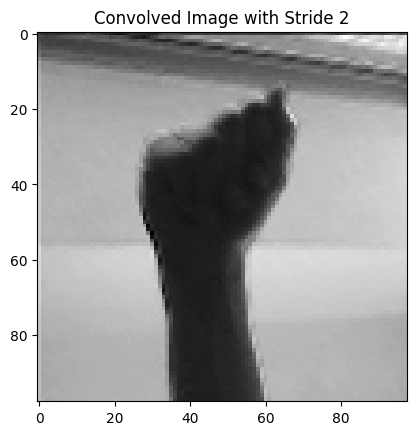

In [9]:
# Define a convolutional layer with a 5x5 kernel, stride of 2, and no padding
conv_layer_stride2 = nn.Conv2d(in_channels=1, out_channels=1, kernel_size=5, stride=2, padding=0)

# Apply the convolution operation
output_conv_stride2 = conv_layer_stride2(image_tensor)

print(f"Convolved Image with Stride 2 Shape: {output_conv_stride2.shape}")

# Visualize the convolved image with stride 2
plt.imshow(output_conv_stride2.squeeze().detach().numpy(), cmap='gray')
plt.title("Convolved Image with Stride 2")
plt.show()

Convolved Image with Padding 2 Shape: torch.Size([1, 1, 202, 202])


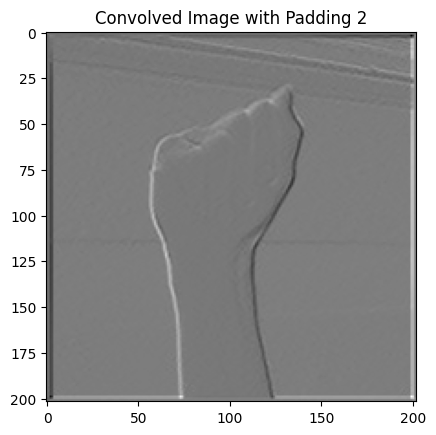

In [10]:
# Define a convolutional layer with a 3x3 kernel, stride of 1, and padding of 2
conv_layer_padding2 = nn.Conv2d(in_channels=1, out_channels=1, kernel_size=3, stride=1, padding=2)

# Apply the convolution operation
output_conv_padding2 = conv_layer_padding2(image_tensor)

print(f"Convolved Image with Padding 2 Shape: {output_conv_padding2.shape}")

# Visualize the convolved image with padding 2
plt.imshow(output_conv_padding2.squeeze().detach().numpy(), cmap='gray')
plt.title("Convolved Image with Padding 2")
plt.show()

In [11]:
# Now like in the previous notebook let's define our NN*

import torch
import torch.nn as nn
import torch.optim as optim

class SimpleCNN(nn.Module):
    def __init__(self, num_classes):
        super(SimpleCNN, self).__init__()
        
        self.convolution = nn.Sequential( # Sequential is a container in PyTorch that allows you to stack multiple layers or modules in a sequential order
            #In channels bc we use RGB image, we use 16 filters of a 5x5 size 
            # By default padding is 0 and stride is 1 so each filter produces a 196*196 new images
            nn.Conv2d(in_channels=3, out_channels=16, kernel_size=5), #output_shape=(batch_size, 16, 196, 196)
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2), #output_shape=(batch_size, 16, 98, 98)
            nn.Conv2d(in_channels=16, out_channels=32, kernel_size=5), #output_shape=(batch_size, 32, 94, 94)
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2), #output_shape=(batch_size, 32, 47, 47)
            nn.Conv2d(in_channels=32, out_channels=64, kernel_size=5), #output_shape=(batch_size, 64, 43, 43)
            nn.ReLU(),
            nn.Conv2d(in_channels=64, out_channels=128, kernel_size=5), #output_shape=(batch_size, 128, 39, 39)
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2), #output_shape=(batch_size, 128, 19, 19)
            nn.Dropout(p=0.2),
            nn.Flatten(),
            nn.Linear(128 * 19 * 19, 128),
            nn.ReLU(),
            nn.Linear(128, num_classes),
        )
        
    def forward(self, x):
        logits = self.convolution(x) #Pytorch and sequential syntax
        return logits
    

# Create an instance of the CNN model
model = SimpleCNN(num_classes=29)

Before continuing some reminders

**Batch Size**:

-   **What:** Number of training examples processed at once.

-   **Why:** Balances memory usage, speed, and gradient noise.

-   **Example:** Batch size = 32 → Process 32 examples per update.

**Epochs**:

-   **What:** One full pass through the entire dataset.

-   **Why:** Determines how many times the model sees all the data.

-   **Example:** 5 epochs → Model sees the whole dataset 5 times.

**Key Difference:**

-   **Batch Size:** Controls how much data is used per update.

-   **Epochs:** Controls how many times the model sees all the data.

**Example:**

-   **Dataset:** 1,000 examples

-   **Batch size:** 100 → 10 updates per epoch.

-   **Epochs:** 5 → 50 total updates.

In [12]:
# So let's build batches for our CNNs,we will use DataLoader from pytorch !

# First we need to convert labels 

class_label = {'A': 0, 'B': 1, 'C': 2, 'D': 3, 'E': 4, 'F': 5, 'G': 6, 'H': 7, 'I': 8, 'J': 9, 'K': 10, 'L': 11, 'M': 12, 'N': 13, 'O': 14, 'P': 15, 'Q': 16, 'R': 17, 'S': 18, 'T': 19, 'U': 20, 'V': 21, 'W': 22, 'X': 23, 'Y': 24, 'Z': 25, 'del': 26, 'nothing': 27, 'space': 28}
label_class = {0: 'A', 1: 'B', 2: 'C', 3: 'D', 4: 'E', 5: 'F', 6: 'G', 7: 'H', 8: 'I', 9: 'J', 10: 'K', 11: 'L', 12: 'M', 13: 'N', 14: 'O', 15: 'P', 16: 'Q', 17: 'R', 18: 'S', 19: 'T', 20: 'U', 21: 'V', 22: 'W', 23: 'X', 24: 'Y', 25: 'Z', 26: 'del', 27: 'nothing', 28: 'space'}

from torch.utils.data import Dataset, DataLoader

class ImageDataset(Dataset):
    def __init__(self, dataframe):
        self.dataframe = dataframe
        self.transform = transform

    def __len__(self):
        return len(self.dataframe)

    def __getitem__(self, idx):
        img_path = self.dataframe.iloc[idx, 1]  # Assuming the second column is the image path
        label = self.dataframe.iloc[idx, 0] # Assuming the first column is the label
        label = class_label[label]   # Converting to a numerical classes
        image = Image.open(img_path).convert('RGB')  # Convert to RGB if not already
        convert_tensor = transforms.ToTensor()
        image = convert_tensor(image)

        if not isinstance(label, torch.Tensor):
            label = torch.tensor(label, dtype=torch.long)
        
        return image, label


# Create the datasets
train_dataset = ImageDataset(dataframe=train_df)
val_dataset = ImageDataset(dataframe=val_df)

# Create the DataLoaders
train_dataloader = DataLoader(train_dataset, batch_size=64, shuffle=True)
val_dataloader = DataLoader(val_dataset, batch_size=64, shuffle=False)  # No need to shuffle validation data

In [13]:
## Backpropagation code

learning_rate = 1e-3
num_epochs = 20

# Define loss function and optimizer
criterion = nn.CrossEntropyLoss()  # Cross entropy for multi classification tasks
optimizer = optim.Adam(model.parameters(), lr=learning_rate) # Adam optmizer the more used in general

# Initialize lists to store losses
train_losses = []
validation_losses = []

device = torch.device("cuda" if torch.cuda.is_available() else "cpu") #if you have torch compiled with GPUs this will greatly accelerate your training

model = model.to(device)

# Lists to store losses and accuracies
train_losses = []
val_losses = []
train_accuracies = []
val_accuracies = []

# Training loop with validation
num_epochs = 10  # Set the number of epochs
for epoch in range(num_epochs):
    model.train()  # Set the model to training mode
    running_loss = 0.0
    correct_train = 0
    total_train = 0

    # Training phase
    for images, labels in train_dataloader:
        # Move images and labels to the device (e.g., GPU)
        images, labels = images.to(device), labels.to(device)
        
        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)
        
        # Backward pass and optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        # Accumulate training loss
        running_loss += loss.item()

        # Compute training accuracy
        _, predicted = torch.max(outputs.data, 1)
        total_train += labels.size(0)
        correct_train += (predicted == labels).sum().item()

    # Compute training loss and accuracy for the epoch
    train_loss = running_loss / len(train_dataloader)
    train_accuracy = 100 * correct_train / total_train

    # Store training loss and accuracy
    train_losses.append(train_loss)
    train_accuracies.append(train_accuracy)

    # Print training loss and accuracy
    print(f"Epoch [{epoch+1}/{num_epochs}], Train Loss: {train_loss:.4f}, Train Accuracy: {train_accuracy:.2f}%")

    # Validation phase
    model.eval()  # Set the model to evaluation mode
    val_loss = 0.0
    correct_val = 0
    total_val = 0

    with torch.no_grad():  # Disable gradient computation for validation
        for images, labels in val_dataloader:
            # Move images and labels to the device (e.g., GPU)
            images, labels = images.to(device), labels.to(device)
            
            # Forward pass
            outputs = model(images)
            loss = criterion(outputs, labels)
            
            # Accumulate validation loss
            val_loss += loss.item()

            # Compute validation accuracy
            _, predicted = torch.max(outputs.data, 1)
            total_val += labels.size(0)
            correct_val += (predicted == labels).sum().item()

    # Compute validation loss and accuracy for the epoch
    val_loss = val_loss / len(val_dataloader)
    val_accuracy = 100 * correct_val / total_val

    # Store validation loss and accuracy
    val_losses.append(val_loss)
    val_accuracies.append(val_accuracy)

    # Print validation loss and accuracy
    print(f"Epoch [{epoch+1}/{num_epochs}], Val Loss: {val_loss:.4f}, Val Accuracy: {val_accuracy:.2f}%")

Epoch [1/10], Train Loss: 0.9672, Train Accuracy: 70.04%
Epoch [1/10], Val Loss: 0.1732, Val Accuracy: 94.27%
Epoch [2/10], Train Loss: 0.1434, Train Accuracy: 95.08%
Epoch [2/10], Val Loss: 0.0870, Val Accuracy: 97.23%
Epoch [3/10], Train Loss: 0.0836, Train Accuracy: 97.24%
Epoch [3/10], Val Loss: 0.0496, Val Accuracy: 98.40%
Epoch [4/10], Train Loss: 0.0626, Train Accuracy: 98.02%
Epoch [4/10], Val Loss: 0.0943, Val Accuracy: 97.16%
Epoch [5/10], Train Loss: 0.0451, Train Accuracy: 98.60%
Epoch [5/10], Val Loss: 0.0301, Val Accuracy: 99.10%
Epoch [6/10], Train Loss: 0.0454, Train Accuracy: 98.52%
Epoch [6/10], Val Loss: 0.0218, Val Accuracy: 99.26%
Epoch [7/10], Train Loss: 0.0338, Train Accuracy: 98.90%
Epoch [7/10], Val Loss: 0.0187, Val Accuracy: 99.46%
Epoch [8/10], Train Loss: 0.0284, Train Accuracy: 99.10%
Epoch [8/10], Val Loss: 0.0456, Val Accuracy: 98.50%
Epoch [9/10], Train Loss: 0.0275, Train Accuracy: 99.17%
Epoch [9/10], Val Loss: 0.0228, Val Accuracy: 99.29%
Epoch [10/

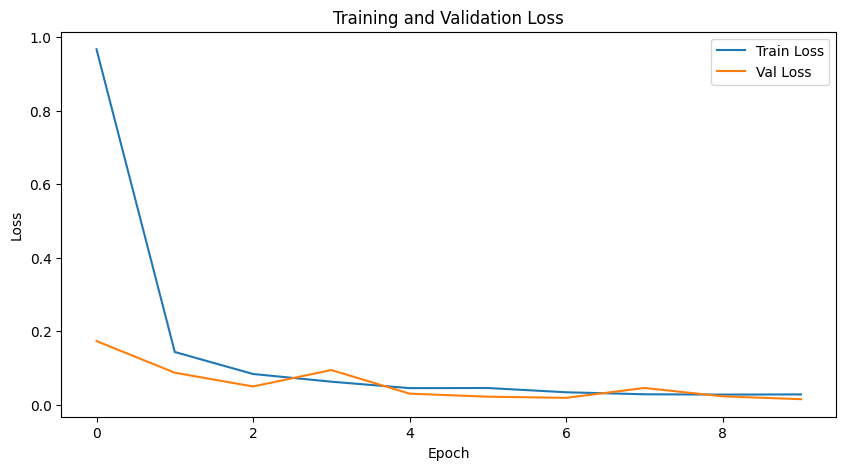

In [14]:
import matplotlib.pyplot as plt

# Plot loss curves
plt.figure(figsize=(10, 5))
plt.plot(train_losses, label="Train Loss")
plt.plot(val_losses, label="Val Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Training and Validation Loss")
plt.legend()
plt.show()

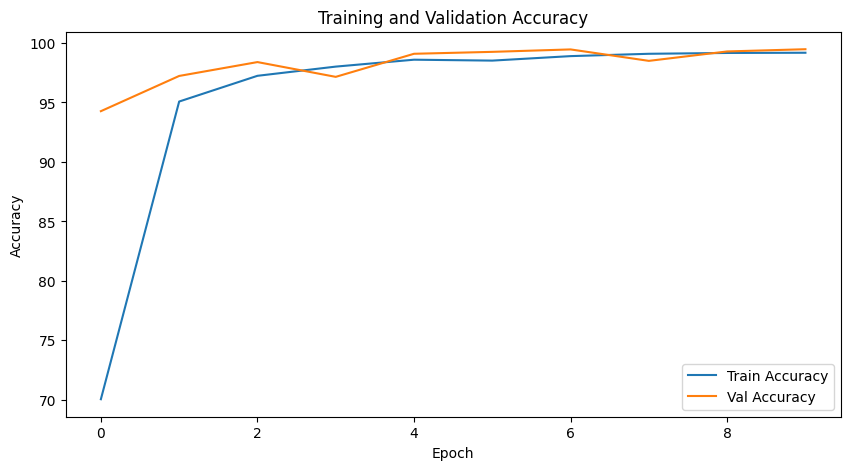

In [15]:
# Plot accuracy curves
plt.figure(figsize=(10, 5))
plt.plot(train_accuracies, label="Train Accuracy")
plt.plot(val_accuracies, label="Val Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.title("Training and Validation Accuracy")
plt.legend()
plt.show()

In [29]:
## Accuracy and losses seems better for validation set because it's compute for the first after the first epochs

## Code for inference the model (back to cpu)

model = model.to("cpu")

def predict_image(image_path, model):
    # Load the image
    image = Image.open(image_path).convert('RGB')  # Convert to RGB if not already

    # Preprocess the image
    convert_tensor = transforms.ToTensor()
    image = convert_tensor(image).unsqueeze(0) # Add batch dimension (batch size = 1)

    # Perform inference
    with torch.no_grad():  # Disable gradient computation
        output = model(image)  # Forward pass
        probabilities = F.softmax(output, dim=1)  # Apply softmax to get probabilities
        _, predicted_class = torch.max(probabilities, 1)  # Get the predicted class

    return predicted_class.item()

# Example usage
image_path = test_df["path"].iloc[0]  #Test
predicted_class = predict_image(image_path, model)

# Print the results
print(f"Predicted Class: {label_class[predicted_class]}")
print(f"Real Class: {test_df['label'].iloc[0]}")

Predicted Class: O
Real Class: O
